# AI/ML Assessment 2

## Imports

In [226]:
# To retrieve requirements to run this notebook, run: !pip freexe > requirements.txt, for a user to install the requirements, run: !pip install -r requirements.txt
import pandas as pd
import seaborn as sns
import plotly.express as px
import sklearn as sk
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
plt.style.use('seaborn-v0_8')


# California Housing dataset 

### Summary of California Housing Dataset:

The California Housing dataset contains features describing various geographical locations in California and targets the median house value for districts. Each data instance represents a district, and the dataset includes the following features:

### Application of Supervised Machine Learning:

1. **Regression Analysis:**
   - The dataset can be used for regression analysis to predict the median house value based on the geographical and demographic features.
   - Various regression algorithms such as linear regression, decision trees, random forests, gradient boosting, or neural networks can be applied.
   - Performance metrics such as mean squared error (MSE), mean absolute error (MAE), root mean squared error (RMSE), and R-squared can be used to evaluate model performance.

### Application of Unsupervised Machine Learning:

1. **Clustering Analysis:**
   - Apply clustering algorithms such as K-means or DBSCAN to group similar geographical regions together based on demographic features.
   - Identify clusters of regions with similar housing characteristics, which can provide insights into spatial patterns and regional disparities.
   - Visualization techniques such as heatmaps or choropleth maps can be used to visualize cluster densities and spatial patterns of housing characteristics.

2. **Dimensionality Reduction:**
   - Use techniques like Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and visualize high-dimensional data in lower dimensions.
   - Explore underlying patterns or relationships between features and identify the most informative features that distinguish between districts.

3. **Anomaly Detection:**
   - Identify outliers or unusual patterns in the data, such as districts with significantly different housing characteristics compared to neighboring regions.
   - Anomaly detection techniques can help identify regions with unexpected housing trends or anomalies in the data, which may require further investigation.

### Summary:
The California Housing dataset offers opportunities for both supervised and unsupervised machine learning techniques. Supervised learning can be applied to predict house prices based on demographic and geographical features, while unsupervised learning can provide insights into spatial patterns, regional disparities, and anomalies within California districts. These techniques can inform urban planning, real estate development, and policy-making decisions by understanding housing market dynamics and socio-economic patterns across different regions of California.

# Data extraction

In [62]:
# California housing data 
housing_df = fetch_california_housing(as_frame=True).frame

# First few rows of the data
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [63]:
# Input features and Target variable
print(f'Features: {fetch_california_housing().feature_names}')
print(f'Target: {fetch_california_housing().target_names}')

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']


In [64]:
# Structure of the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [177]:
# Data set description
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# EDA

In [65]:
# Numerical features to perform EDA on as Lat/Lon are geographical coordinates
numerical_features = housing_df.drop(['Latitude', 'Longitude'],axis=1)

# Summary statistics of numerical features
numerical_features.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


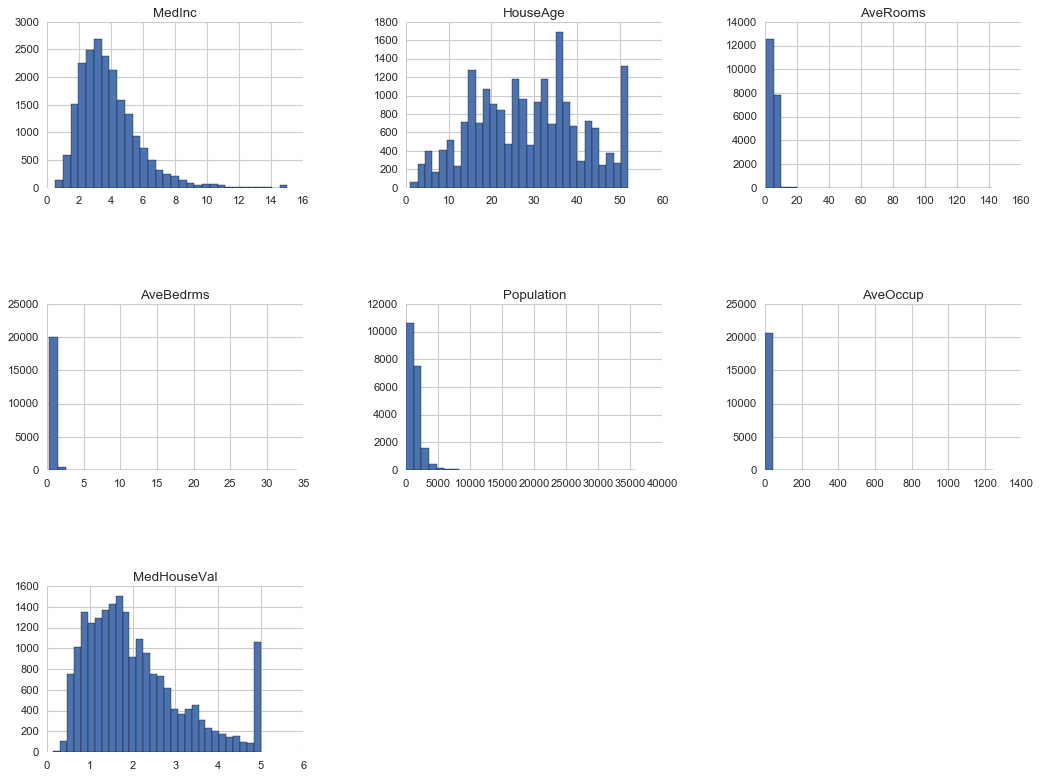

In [136]:
# Numerical Feature distributions
numerical_features.hist(figsize=(14, 11),
                         bins=30,
                           edgecolor="black")

# Subplots adjustment
plt.subplots_adjust(hspace=0.7, wspace=0.4)

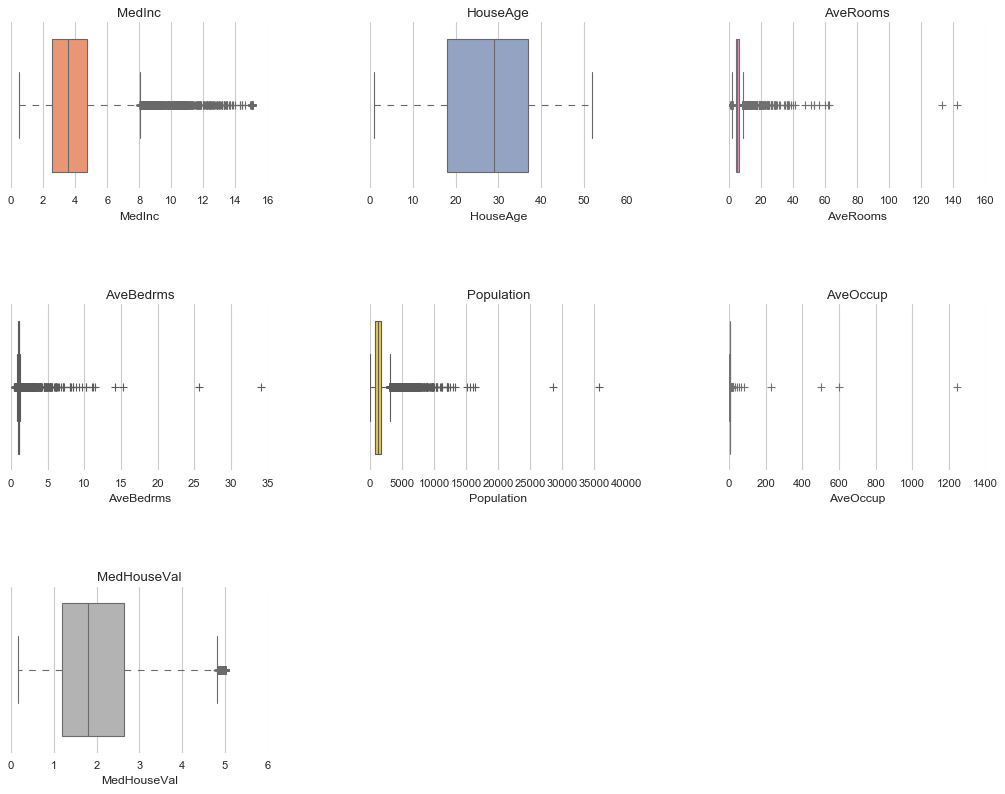

In [141]:
# palette colour for the box plots
palette = sns.color_palette("Set2")

# Box plots for Numerical features to see outliers and distribution better
plt.figure(figsize=(14, 11))

# Loop through the numerical features using enumerate to get the index and column name
for i, col in enumerate(numerical_features.columns, 1):
    
    # Create subplots for 3x3 grid
    plt.subplot(3, 3, i)
    
    # Create boxplot for each numerical feature
    sns.boxplot(x=numerical_features[col],
                 color=palette[i])

    # Set title for each boxplot
    plt.title(col)

# Subplots adjustment and displayment of boxplots
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

<Axes: >

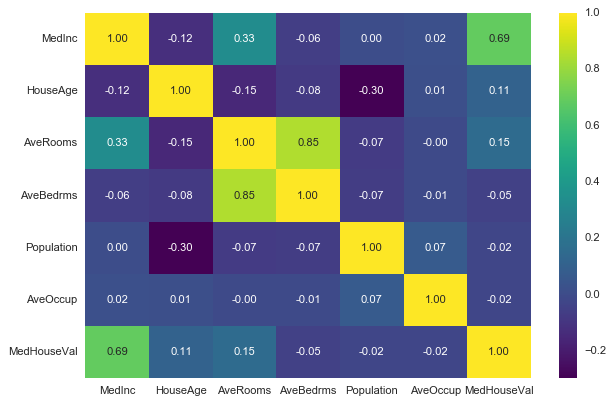

In [144]:
# Heatmap and Correlation matrix of numerical features
sns.heatmap(numerical_features.corr(),
             annot=True,
               cmap = 'viridis',
                 fmt='.2f')

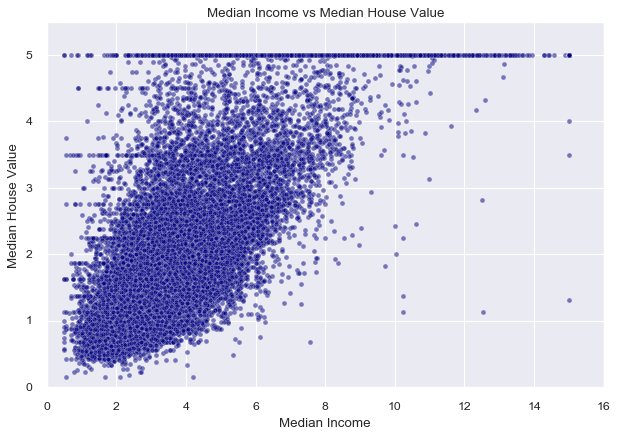

In [181]:
# Scatter plot of Median Income vs Median House Value (Strong positive correlation)
sns.scatterplot(x='MedInc',
                 y='MedHouseVal',
                   data=housing_df,
                     alpha=0.5,
                     color='navy')

# Visual adjustments, for x and y axis limits, labels and title
plt.xlim(0, 16)
plt.ylim(0, 5.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs Median House Value')
plt.show()

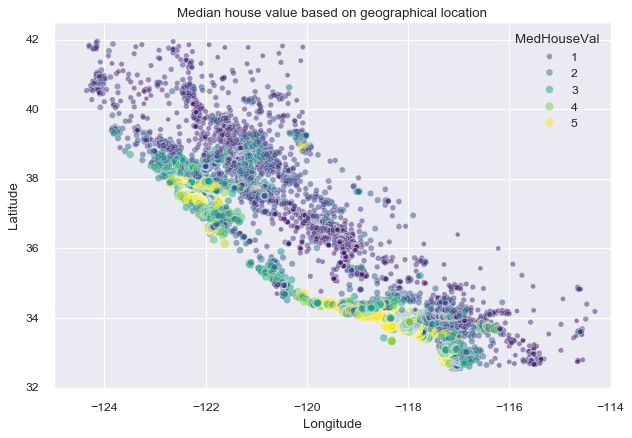

In [183]:
# Scatter plot of Median House Value based on geographical location
sns.scatterplot(data = housing_df,
                 x = "Longitude",
                   y = "Latitude",
                     size = "MedHouseVal",
                       hue = "MedHouseVal",
                         palette = "viridis",
                           alpha=0.5)

# Visual adjustments, for x and y axis limits, labels, legend and title
plt.ylim(32, 42.5)
plt.xlim(-125, -114)
plt.legend(title = "MedHouseVal")
plt.title("Median house value based on geographical location")
plt.show()

# Data Preprocessing

In [170]:
# Columns within the housing df
housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [196]:
# Features that outlier handling will be performed on
outlier_removal_feats = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [212]:
# List to store Outliers based on the IQR method
outliers = []

# Function to calculate elements above and below the IQR
def calc_elements_upper_and_lower_than_IQR(feature_name):

    """
    This function calculates outliers for a given feature using the IQR method.
    
    Parameters:
        feature_name (str): Name of the feature for which outliers are to be calculated.
        
    Returns:
        outliers_upper (pandas.Series): Boolean array indicating elements above the upper bound.
        outliers_lower (pandas.Series): Boolean array indicating elements below the lower bound.
    """
    
    # Upper and Lower Quartile (Q3 and Q1)
    lq = housing_df[feature_name].quantile(0.25)
    uq = housing_df[feature_name].quantile(0.75)

    # IQR (Interquartile Range)
    IQR = uq - lq

    # Outliers that lie above the upper bound
    outliers_upper = housing_df[feature_name] >= (uq + 1.5 * IQR)

    # Outliers that lie below the lower bound
    outliers_lower = housing_df[feature_name] <= (lq - 1.5 * IQR)

    return outliers_upper, outliers_lower

In [213]:
# iterating to append the outliers to the list
for feature in outlier_removal_feats:

    # Outliers above and below the IQR based on each feature
    outliers_upper, outliers_lower = calc_elements_upper_and_lower_than_IQR(feature)
    
    # Appending the outliers to the list
    outliers.append(outliers_upper | outliers_lower)
    
outliers

[0         True
 1         True
 2        False
 3        False
 4        False
          ...  
 20635    False
 20636    False
 20637    False
 20638    False
 20639    False
 Name: MedInc, Length: 20640, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 20635    False
 20636    False
 20637    False
 20638    False
 20639    False
 Name: HouseAge, Length: 20640, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 20635    False
 20636    False
 20637    False
 20638    False
 20639    False
 Name: AveRooms, Length: 20640, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 20635    False
 20636     True
 20637    False
 20638    False
 20639    False
 Name: AveBedrms, Length: 20640, dtype: bool,
 0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 20635    False
 2063

In [214]:
# Any outliers which are below or above the IQR method for each feature, returned True in the array
Outliers_to_remove = np.any(outliers, axis = 0)
     
# Index of the records with outliers
index_outliers = np.where(Outliers_to_remove)
     
# total number of outliers
len(index_outliers[0])

3800

In [224]:
# Cleaned data without outliers
housing_cleaned_df = housing_df.drop(index_outliers[0], axis=0)

housing_cleaned_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


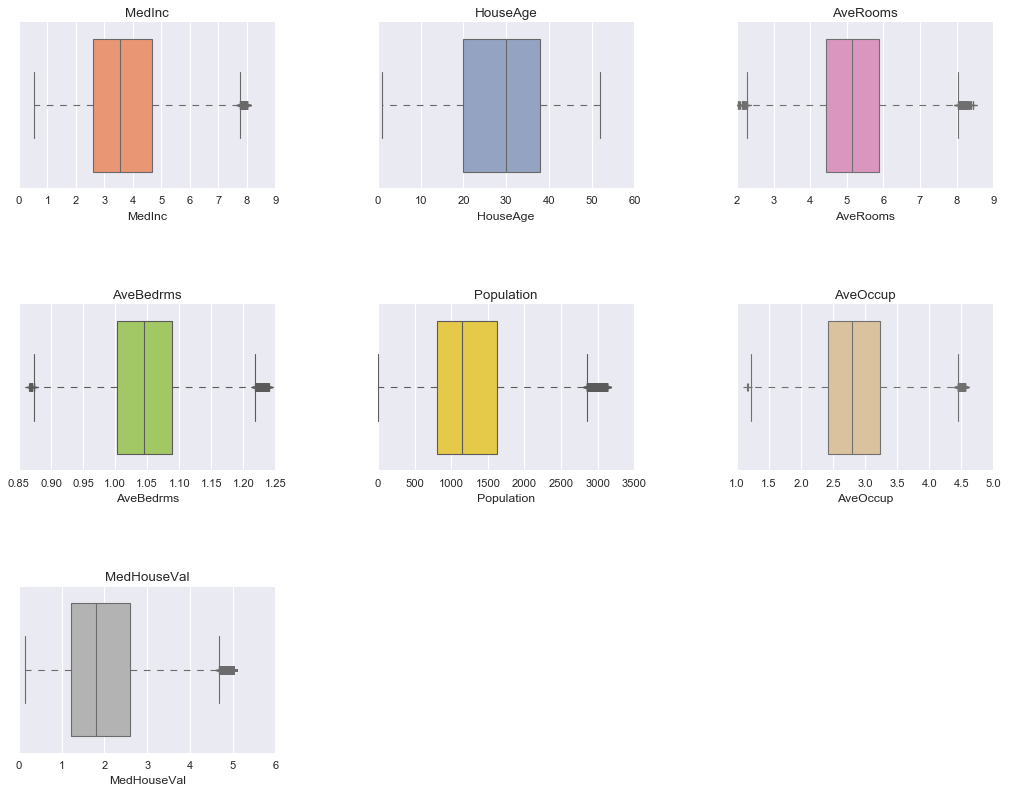

In [223]:
# palette colour for the box plots
palette = sns.color_palette("Set2")

# Cleaned features to visualise after IQR method
cleaned_numerical_features = housing_cleaned_df.drop(['Latitude', 'Longitude'],axis=1)

# Box plots for cleaned features
plt.figure(figsize=(14, 11))

# Loop through the numerical features using enumerate to get the index and column name
for i, col in enumerate(cleaned_numerical_features, 1):
    
    # Create subplots for 3x3 grid
    plt.subplot(3, 3, i)
    
    # Create boxplot for each numerical feature
    sns.boxplot(x=cleaned_numerical_features[col],
                 color=palette[i])

    # Set title for each boxplot
    plt.title(col)

# Subplots adjustment and displayment of boxplots
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

# Supervised ML Question

### Question: Can we predict the median house value (target variable) in California districts based on various demographic and geographical features?

In [230]:
# input and target variables
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_uncleaned = RandomForestRegressor(n_estimators=150, max_depth = 10 , min_samples_split=5, random_state=42)

# Fitting the model
rf_uncleaned.fit(X_train, y_train)
# Predictions
y_pred_uncleaned = rf_uncleaned.predict(X_test)

# Mean Absolute Error
mae_uncleaned = np.mean(abs(y_test - y_pred_uncleaned))
print(f'Mean Absolute Error: {mae_uncleaned}')

# Mean Squared Error
mse_uncleaned = np.mean((y_test - y_pred_uncleaned)**2)
print(f'Mean Squared Error: {mse_uncleaned}')

# Root Mean Squared Error
rmse_uncleaned = np.sqrt(mse_uncleaned)
print(f'Root Mean Squared Error: {rmse_uncleaned}')

# R2 Score
r2_uncleaned = rf_uncleaned.score(X_test, y_test)
print(f'R2 Score: {r2_uncleaned}')

Mean Absolute Error: 0.3660387089179443
Mean Squared Error: 0.2954163994064276
Root Mean Squared Error: 0.5435222161111978
R2 Score: 0.7745616793598314


In [231]:
Predictions_uncleaned = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_uncleaned})
Predictions_uncleaned

,Actual,Predicted
20046,0.47700,0.557701
3024,0.45800,0.825354
15663,5.00001,4.768331
20484,2.18600,2.476381
9814,2.78000,2.044053
...,...,...
15362,2.63300,2.085637
16623,2.66800,1.677166
18086,5.00001,4.767861
2144,0.72300,0.771104


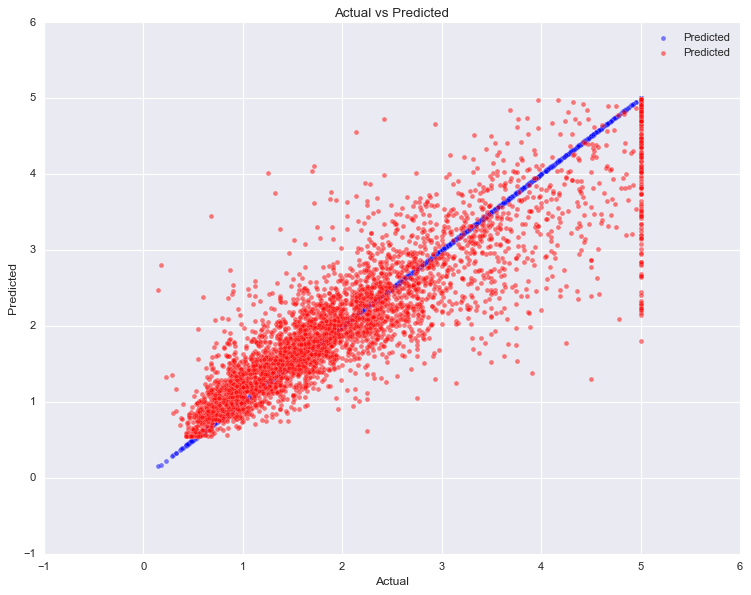

In [250]:

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_test, c='blue', label='Predicted', alpha=0.5)
# Plotting predicted values as red dots
plt.scatter(y_test, y_pred_uncleaned, c='red', label='Predicted', alpha=0.5)  

# Adding labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()



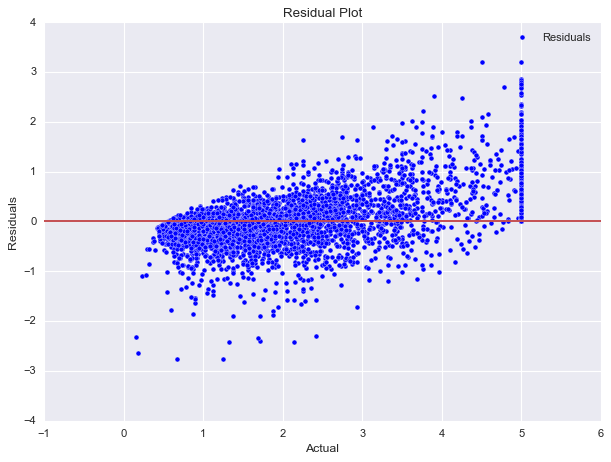

In [252]:
# 2. Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_pred_uncleaned, c='blue', marker='o', label='Residuals')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.grid(True)
plt.show()



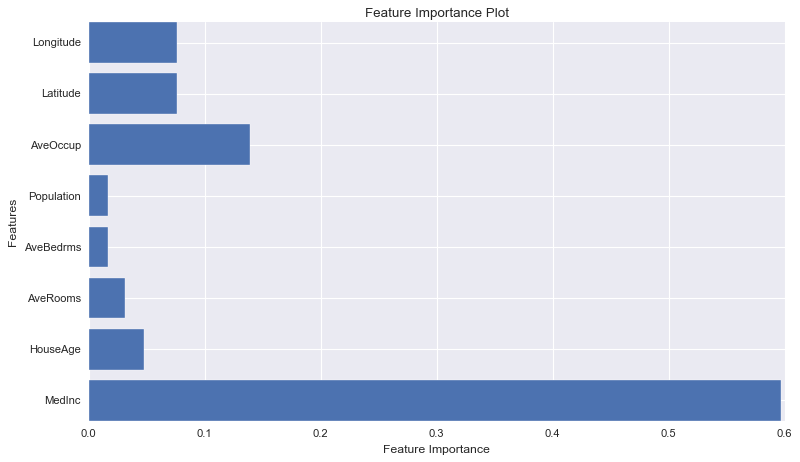

In [253]:
# 3. Feature Importance Plot
feature_importance = rf_uncleaned.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

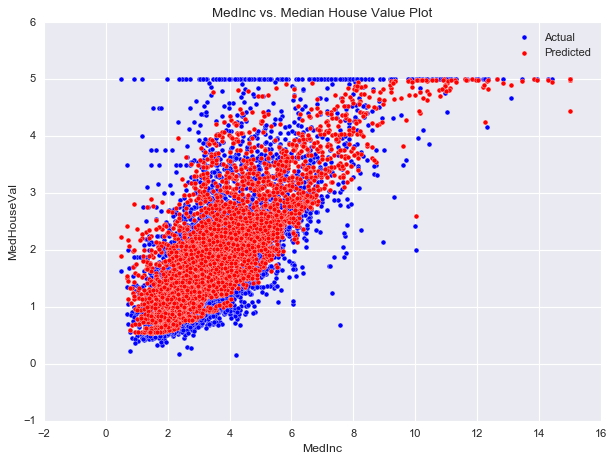

In [255]:
# 5. Feature vs. Target Plot (example for a single feature)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['MedInc'], y_test, c='blue', marker='o', label='Actual')
plt.scatter(X_test['MedInc'], y_pred_uncleaned, c='red', marker='o', label='Predicted')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('MedInc vs. Median House Value Plot')
plt.legend()
plt.grid(True)
plt.show()

# Unsupervised ML Questions
### Can the California Housing data be clustered into economic regions based on median_income?